# Figure 3

Code for generating figure 3

\12D_losses_10_dense

Processing: 12D_losses_10_dense.txt


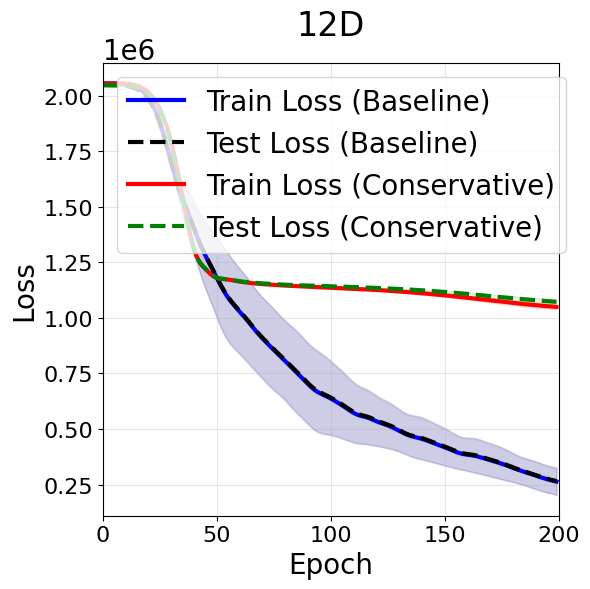

\12D_losses_1_n=2

Processing: 12D_losses_1_n=2.txt


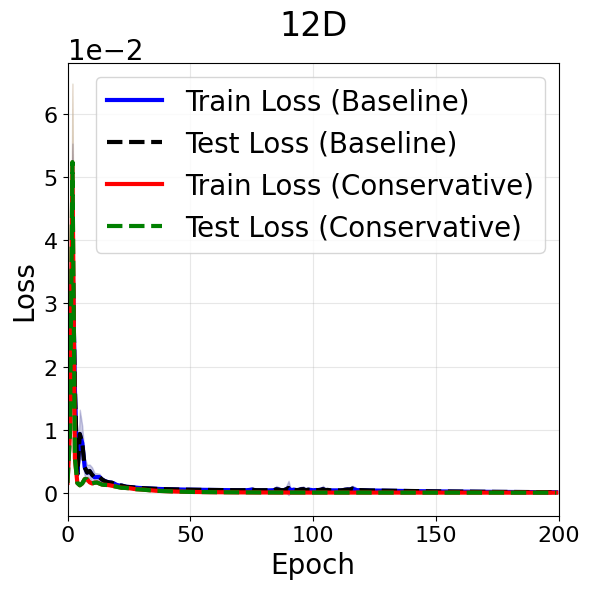

\12D_losses_2_n=15

Processing: 12D_losses_2_n=15.txt


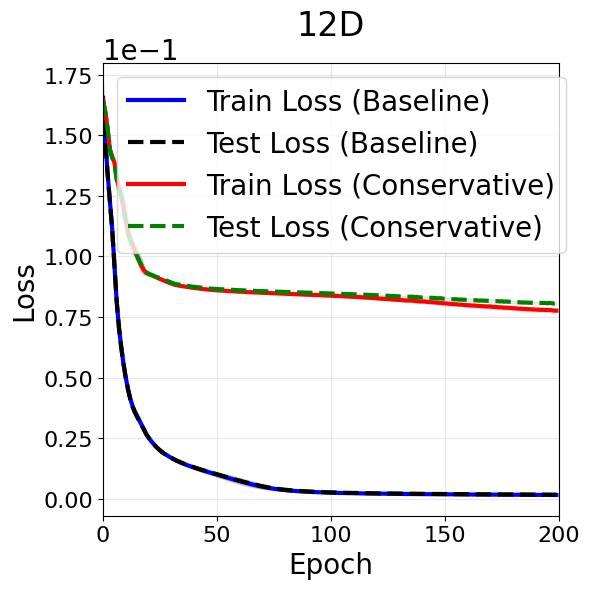

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

def read_losses(file_path):
    """Reads the loss data from a file and returns it in a structured dictionary."""
    data = np.loadtxt(file_path, skiprows=1)
    
    results = {
        'epochs': data[:, 0],
        'mean_loss': data[:, 1],
        'std_loss': data[:, 2],
        'mean_test_loss': data[:, 3],
        'std_test_loss': data[:, 4],
        'mean_loss_grad': data[:, 5],
        'std_loss_grad': data[:, 6],
        'mean_test_loss_grad': data[:, 7],
        'std_test_loss_grad': data[:, 8],
    }
    return results

# Define the dimensions and neurons to process
dimensions = ["2D", "5D", "8D", "12D", "20D"]
neurons = [256, 256, 256]  # Fixed for all files
neuron_str = "_256_256_256"
lw1 = 2  # Global line width parameter
lw2 = 3

os.makedirs("figs", exist_ok=True)

experiments_dir = Path("experiment_data")
# Iterate over all files in the directory (no filtering)
for file_path in experiments_dir.glob('*'):
    file_name = (str(file_path)[len("experiment_data"):-4])
    print (file_name)
    if file_path.is_file():  # Ensure it's a file (not a subdirectory)
        print(f"\nProcessing: {file_path.name}")
        results = read_losses(file_path)  # Your existing processing function

        epochs = results['epochs']
        mean_loss = results['mean_loss']
        std_loss = results['std_loss']
        mean_test_loss = results['mean_test_loss']
        std_test_loss = results['std_test_loss']
        mean_loss_grad = results['mean_loss_grad']
        std_loss_grad = results['std_loss_grad']
        mean_test_loss_grad = results['mean_test_loss_grad']
        std_test_loss_grad = results['std_test_loss_grad']
        
        #plt.figure(figsize=(20, 8))

        fig, ax = plt.subplots(figsize=(6, 6))
        
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    
        # === Baseline NN ===
        plt.plot(epochs, mean_loss, label="Train Loss (Baseline)", color="blue", linestyle="-", lw=lw2)
        plt.fill_between(epochs, mean_loss - std_loss, mean_loss + std_loss, color="blue", alpha=0.1)
        plt.plot(epochs, mean_test_loss, label="Test Loss (Baseline)", color="black", linestyle="--", lw=lw2)
        plt.fill_between(epochs, mean_test_loss - std_test_loss, mean_test_loss + std_test_loss, color="black", alpha=0.1)
        
        # === Conservative NN ===
        plt.plot(epochs, mean_loss_grad, label="Train Loss (Conservative)", color="red", linestyle="-", lw=lw2)
        plt.fill_between(epochs, mean_loss_grad - std_loss_grad, mean_loss_grad + std_loss_grad, color="red", alpha=0.1)
        plt.plot(epochs, mean_test_loss_grad, label="Test Loss (Conservative)", color="green", linestyle="--", lw=lw2)
        plt.fill_between(epochs, mean_test_loss_grad - std_test_loss_grad, mean_test_loss_grad + std_test_loss_grad, color="green", alpha=0.1)
        
        # === Formatting ===
        plt.xlabel("Epoch", fontsize=20)
        plt.ylabel("Loss", fontsize=20)
        plt.title("12D", fontsize=24, pad=20)
        plt.xlim([0, 200])
        plt.grid(True, alpha=0.3)

        # Adjust tick label size
        plt.tick_params(axis='both', which='major', labelsize=16)
        plt.tick_params(axis='both', which='minor', labelsize=12)

        # Change the font size of the offset text
        #ax.xaxis.get_offset_text().set_fontsize(16)
        ax.yaxis.get_offset_text().set_fontsize(20)
        
        plt.tight_layout()
        plt.legend(loc='best', fontsize = 15)
        # Save figure
        plt.savefig(f"figs/{file_name}.png", bbox_inches="tight")
        plt.show()
        plt.close()  # Close the figure to free memory
